### <center>COMPUTATIONAL METHODS IN FINANCE - MGMTMFE 405</center>
### <center>Project - 1</center>
#### <center>Akhil Srivastava</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon
from scipy.stats import norm
import time

## Question 1

In [2]:
# Using the LGM method, generates Uniformly distributed random numbers on [0,1]
def LGM_unif_gen(size=1, seed=42):
    m = 2**31 - 1
    a = 7**5    
    rand_nums = np.empty(size)
    rand_nums[0] = seed
    for i in range(1, size):
        rand_nums[i] = a*rand_nums[i-1]%m
    return rand_nums/m

**Part a**

In [3]:
# Generate 1,000 random numbers with Binomial distribution
size = 1000
seed = 42
n = 44
p = 0.64

rand_unifs = LGM_unif_gen(size*n, seed).reshape((size, n))
rand_berns = rand_unifs < p
rand_bins =  np.empty(size)
for i in range(size):
    rand_bins[i] = rand_berns[i, :].sum()

# Compute the probability that the random variable X, that has Binomial(44, 0.64) distribution, is at least 35
p_x_gte_35_sim = (rand_bins >= 35).sum()/size

print("Esimated P(X >= 35) =", p_x_gte_35_sim)

# Use any statistics textbook or online resources for the exact number for the above probability
p_x_gte_35_exact = 0.02
print("Exact P(X >= 35) =", p_x_gte_35_exact)

# Compare it with your finding and comment
print("Estimation Error = {:.2f} %".format(abs(p_x_gte_35_sim-p_x_gte_35_exact)/p_x_gte_35_exact*100))

Esimated P(X >= 35) = 0.021
Exact P(X >= 35) = 0.02
Estimation Error = 5.00 %


Despite using only 1000 samples, estimation error is 5%, which is reasonably good.

**Part b**

Simulation P(X >= 1) = 0.5069
Simulation P(X >= 4) = 0.0683
Empirical Mean: 1.4788
Empirical Standard Deviation: 1.4792


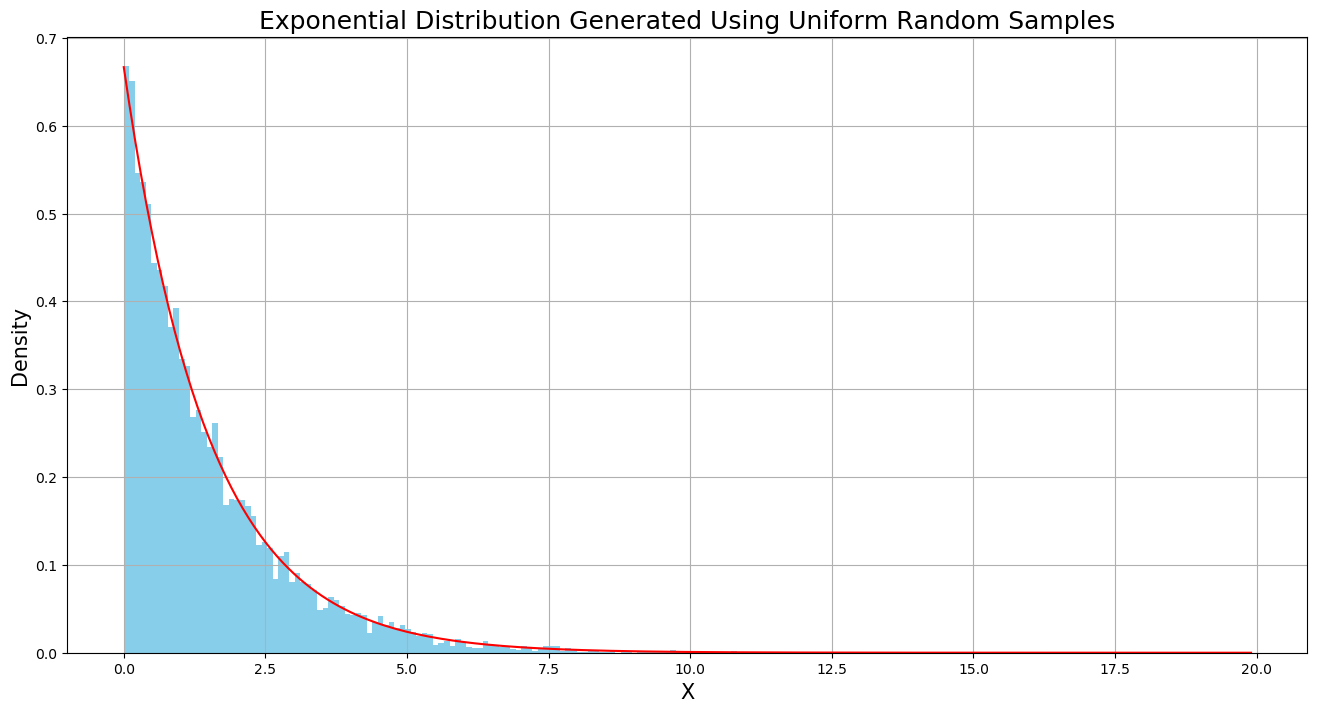

In [4]:
# Generate 10,000 Exponentially distributed random numbers with parameter 𝜆 = 1.5
size = 10000
seed = 42
exp_lambda = 1.5

rand_unifs = LGM_unif_gen(size, seed)
rand_exps = -exp_lambda*np.log(1-rand_unifs)

# Estimate 𝑃(𝑋≥1); 𝑃(𝑋≥4); and compute the empirical mean and the standard deviation of the sequence of 10,000 numbers
print("Simulation P(X >= 1) =", (rand_exps >= 1).sum()/size)
print("Simulation P(X >= 4) =", (rand_exps >= 4).sum()/size)
print("Empirical Mean: {:.4f}".format(rand_exps.mean()))
print("Empirical Standard Deviation: {:.4f}".format(rand_exps.std()))

# Draw the histogram by using the 10,000 numbers you have generated
x_vals = np.arange(0, 20, 0.1)
exp_pdf_vals = expon.pdf(x_vals, scale = exp_lambda)

plt.figure(figsize=(16, 8))
plt.hist(rand_exps, density=True, bins=200, color='skyblue')
plt.plot(x_vals, exp_pdf_vals, color='red')
plt.title("Exponential Distribution Generated Using Uniform Random Samples", fontsize=18)
plt.xlabel("X", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.grid(True)
plt.show();

**Part c**

In [5]:
# Generates size Normally distributed random numbers with mean 0 and variance 1 using the Box-Muller Method
def box_muller_norm_gen(size=1, seed=42):
    n_unif = int(size/2) if size%2 == 0 else int(size/2) + 1
    u1 = LGM_unif_gen(n_unif, seed)
    u2 = LGM_unif_gen(n_unif, size*seed)

    z1 = (-2*np.log(u1))**0.5*np.sin(2*np.pi*u2)
    z2 = (-2*np.log(u1))**0.5*np.cos(2*np.pi*u2)

    return np.concatenate((z1, z2))[:size]

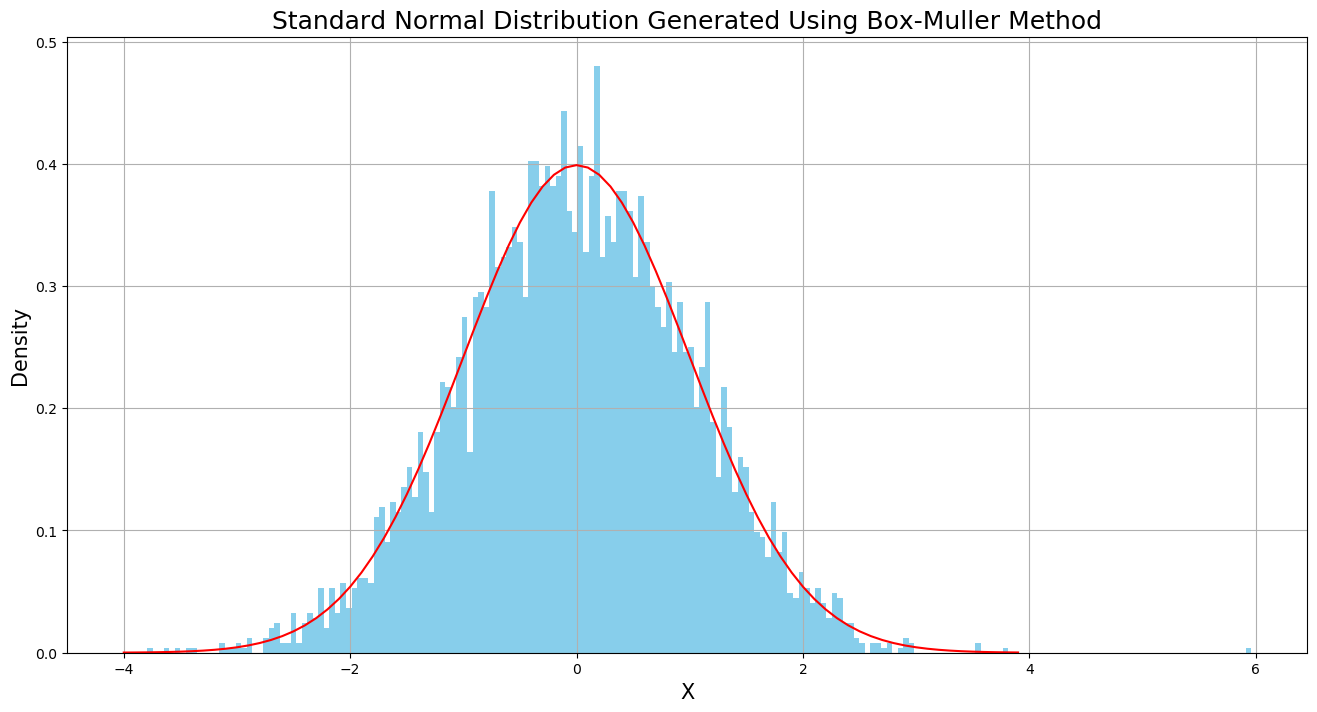

In [6]:
# Generate 5,000 Normally distributed random numbers with mean 0 and variance 1, by using the Box-Muller Method
size = 5000
seed = 42
rand_norms = box_muller_norm_gen(size, seed)

# Draw the histogram of the generated samples along with the actual pdf of standard normal distribution
x_vals = np.arange(-4, 4, 0.1)
norm_pdf_vals = norm.pdf(x_vals)

plt.figure(figsize=(16, 8))
plt.hist(rand_norms, density=True, bins=200, color='skyblue')
plt.plot(x_vals, norm_pdf_vals, color='red')
plt.title("Standard Normal Distribution Generated Using Box-Muller Method", fontsize=18)
plt.xlabel("X", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.grid(True)
plt.show();

**Part d**

In [7]:
# Generates size Normally distributed random numbers with mean 0 and variance 1, by using the Polar-Marsaglia method
def polar_marsaglia_norm_gen(size=1, seed=42):
    n_unif = int(size/2) if size%2 == 0 else int(size/2) + 1
    # Divide by the probability of succsess to manage failures and add 10% buffer
    n_unif = int(n_unif*4/np.pi*1.1)
    u1 = LGM_unif_gen(n_unif, seed)
    u2 = LGM_unif_gen(n_unif, size*seed)

    v1 = 2*u1 - 1
    v2 = 2*u2 - 1
    w  = v1**2 + v2**2

    mask = np.where(w <= 1)
    v1 = v1[mask]
    v2 = v2[mask]
    w = w[mask]

    z1 = (-2*np.log(w)/w)**0.5*v1
    z2 = (-2*np.log(w)/w)**0.5*v2

    return np.concatenate((z1, z2))[:size]

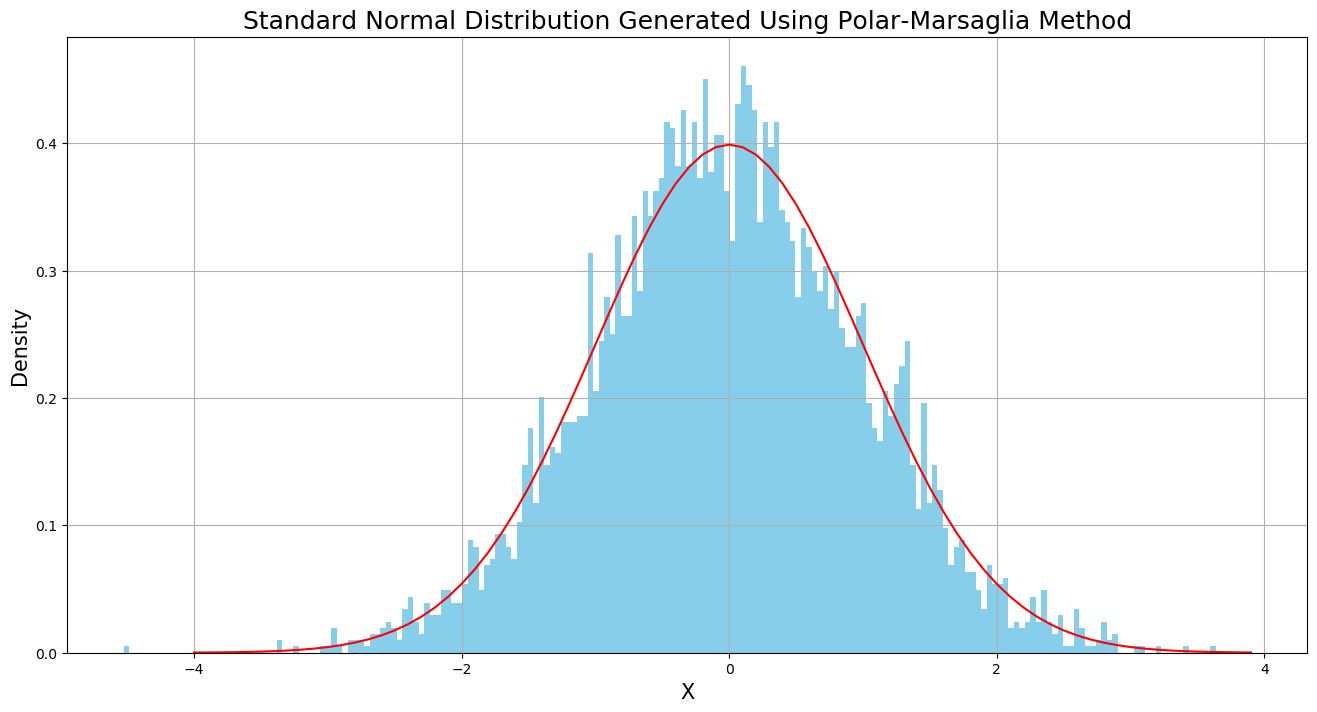

In [8]:
# Generate 5,000 Normally distributed random numbers with mean 0 and variance 1, by using the Polar-Marsaglia method
size = 5000
seed = 42
rand_norms = polar_marsaglia_norm_gen(size, seed)

# Draw the histogram of the generated samples along with the actual pdf of standard normal distribution
x_vals = np.arange(-4, 4, 0.1)
norm_pdf_vals = norm.pdf(x_vals)

plt.figure(figsize=(16, 8))
plt.hist(rand_norms, density=True, bins=200, color='skyblue')
plt.plot(x_vals, norm_pdf_vals, color='red')
plt.title("Standard Normal Distribution Generated Using Polar-Marsaglia Method", fontsize=18)
plt.xlabel("X", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.grid(True)
plt.show();

**Part e**

In [9]:
size = 500000
seed = 42

# Compute execution time for the Box-Muller Method
start = time.process_time_ns()
rand_norms = box_muller_norm_gen(size, seed)
exec_time_box_muller = time.process_time_ns() - start

# Compute execution time for the Polar-Marsaglia Method
start = time.process_time_ns()
rand_norms = polar_marsaglia_norm_gen(size, seed)
exec_time_polar_marsaglia = time.process_time_ns() - start

# Compare the efficiencies of the two above-algorithms
exec_time_ratio = exec_time_polar_marsaglia/exec_time_box_muller
print("Polar-Marsaglia to Box-Muller Executoion-Time-Ratio: {:.2f}".format(exec_time_ratio))

Polar-Marsaglia to Box-Muller Executoion-Time-Ratio: 1.33


As Polar-Marsaglia to Box-Muller Execution-Time-Ratio is greater than one, Box-Muller method is more efficient.

## Question 2

**Part a**

In [10]:
# Estimates A(t) and B(t) using barebones monte-carlo
def At_Bt_BBMC(t, size=100000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    Wt = t**0.5*z
    At_seq = Wt**2 + np.sin(Wt)
    Bt_seq = np.exp(t/2)*np.cos(Wt)
    At = At_seq.mean()
    Bt = Bt_seq.mean()
    
    print("t=", t, ": ", "A(t) = {:.4f}".format(At), ", B(t) = {:.4f}".format(Bt),sep='') 
    return Bt_seq

In [52]:
# Estimate A(t) and B(t) for 𝑡 = 1, 3, 5 using simulation
size = 1000000
seed = 42
Bt_seq_1 = At_Bt_BBMC(1, size, seed)
Bt_seq_3 = At_Bt_BBMC(3, size, seed)
Bt_seq_5 = At_Bt_BBMC(5, size, seed)

t=1: A(t) = 0.9995, B(t) = 0.9996
t=3: A(t) = 3.0005, B(t) = 0.9980
t=5: A(t) = 5.0013, B(t) = 0.9935


**Part b**

In [12]:
Bt_corr = np.corrcoef([Bt_seq_1, Bt_seq_3, Bt_seq_5])
print("Correlation Matrix of B(t):\n\n", Bt_corr)

Correlation Matrix of B(t):

 [[1.         0.86242223 0.59055444]
 [0.86242223 1.         0.89466957]
 [0.59055444 0.89466957 1.        ]]


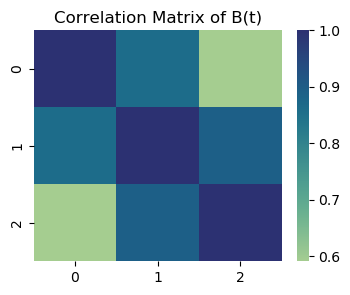

In [13]:
plt.figure(figsize=(4, 3))
sns.heatmap(Bt_corr, cmap='crest')
plt.title('Correlation Matrix of B(t)')
plt.show()

**Part c**

In [14]:
# B(t) estimation using barebone monte-carlo
def Bt_BBMC(t, size=100000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    Wt = t**0.5*z    
    Bt_seq = np.exp(t/2)*np.cos(Wt)
    
    Bt = Bt_seq.mean()
    Bt_std = (Bt_seq.var()/size)**0.5
    return Bt, Bt_std

# B(t) estimation using t*cos(Wt) as control variate, which has expected value t*exp(-t/2)
def Bt_CVMC(t, size=100000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    Wt = t**0.5*z
    # Using t*cos(Wt) as control variate, which has expected value t*exp(-t/2)
    Bt_hat_seq = np.exp(t/2)*np.cos(Wt) - t*np.cos(Wt)

    Bt_hat = t*np.exp(-t/2) + Bt_hat_seq.mean()
    Bt_hat_std = (Bt_hat_seq.var()/size)**0.5
    return Bt_hat, Bt_hat_std

In [15]:
# Use a variance reduction technique (whichever you want) to compute the expected value 𝐵(5)
size = 10000000
seed = 42
t = 5

df_stats = pd.DataFrame()
df_stats["Size"] = [size]

start = time.process_time_ns()
Bt, Bt_std = Bt_BBMC(t, size, seed)
exec_time_barebones = time.process_time_ns() - start
df_stats["B5"] = Bt
df_stats["Std[B5]"] = Bt_std

start = time.process_time_ns()
Bt_cv, Bt_std_cv = Bt_CVMC(t, size, seed)
exec_time_cv = time.process_time_ns() - start
df_stats["B5_CV"] = Bt_cv
df_stats["Std[B5]_CV"] = Bt_std_cv

# Do you see any improvements? Comment on your findings
std_ratio = Bt_std_cv/Bt_std
time_ratio = exec_time_cv/exec_time_barebones

df_stats["Std_Ratio"] = std_ratio
df_stats["Time_Ratio"] = time_ratio
df_stats["Eff_Ratio"] =  1/(time_ratio*std_ratio**2)

In [16]:
print("Statistics for the comparison between barebones monte-carlo and control variate method:")
display(df_stats)

Statistics for the comparison between barebones monte-carlo and control variate method:


,Size,B5,Std[B5],B5_CV,Std[B5]_CV,Std_Ratio,Time_Ratio,Eff_Ratio
0,10000000,0.996895,0.002706,0.998169,0.001595,0.589575,1.333333,2.157661


$\cos\theta$ is an even function, so antithetic method doesn't work as a variance reduction technique for $B(t)$. Due to this reason, control variate method with $t\,\cos{(W_t)}$ as the control variate is used. Note that $t\,\cos{(W_t)}$ has a expected value of $t\,e^{-t/2}$, which is used for $B(t)$ estimation.

As we can see, using the control variate method, the standard deviation has come down by a factor of approximateky 0.6 times, meaning accuracy has improved. Due to this reason, even though execution time has increased, we are able to achieve an efficiency gain between 2-3.

## Question 3

**Part a**

In [17]:
# Estimates the price of a European Call option using Monte Carlo simulation
def BSEC_BBMC(S0, X, r, T, sigma, size=100000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    ST = S0*np.exp((r-sigma**2/2)*T + sigma*T**0.5*z)
    CT = (ST-X).clip(min=0)
    Ct = np.exp(-r*T)*CT
    return Ct.mean(), (Ct.var()/size)**0.5

In [18]:
size = 10000000
seed = 42

r = 0.055
sigma = 0.2
S0 = 100

T = 5
X = 100

# Dataframe to store stats for different methods
df_stats = pd.DataFrame()
df_stats["Size"] = [size]

# Estimate the price c of a European Call option on the stock with 𝑇=5, 𝑋=$100 by using Monte Carlo simulation
start = time.process_time_ns()
Ct, Ct_std = BSEC_BBMC(S0, X, r, T, sigma, size, seed)
exec_time_barebones = time.process_time_ns() - start

df_stats["Ct"] = Ct
df_stats["Std[Ct]"] = Ct_std

In [19]:
display(df_stats)

,Size,Ct,Std[Ct]
0,10000000,30.372335,0.013045


In [20]:
print("Estimated European Call option price c using Monte Carlo simulation, Ca = {:.4f}".format(df_stats["Ct"].values[0]))

Estimated European Call option price c using Monte Carlo simulation, Ca = 30.3723


**Part b**

In [21]:
def z_plus(S0, X, r, T, sigma):
    return (np.log(S0/X) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))

# Computes the exact value of the option c using the Black-Scholes formula
def BSEC(S0, X, r, T, sigma):
    zp = z_plus(S0, X, r, T, sigma)
    zm = zp - sigma*np.sqrt(T)
    return S0*norm.cdf(zp) - np.exp(-r*T)*X*norm.cdf(zm)

In [22]:
# Compute the exact value of the option c using the Black-Scholes formula
c = BSEC(S0, X, r, T, sigma)
print("The exact value of the option c using the Black-Scholes formula, Cb = {:.4f}".format(c))

The exact value of the option c using the Black-Scholes formula, Cb = 30.3727


**Part c**

In [23]:
# Estimates the price of a European Call option using Antithetic variance reduction method
def BSEC_ATMC(S0, X, r, T, sigma, size=100000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    
    ST_n = S0*np.exp((r-sigma**2/2)*T + sigma*T**0.5*z)
    CT_n = (ST_n-X).clip(min=0)
    Ct_n = np.exp(-r*T)*CT_n
    
    ST_a = S0*np.exp((r-sigma**2/2)*T - sigma*T**0.5*z)
    CT_a = (ST_a-X).clip(min=0)
    Ct_a = np.exp(-r*T)*CT_a
    
    Ct = 0.5*(Ct_n + Ct_a)
    return Ct.mean(), (Ct.var()/size)**0.5

In [24]:
# Use variance reduction techniques to estimate the price in part (a) again using the same number of simulations
start = time.process_time_ns()
Ct_ant, Ct_std_ant = BSEC_ATMC(S0, X, r, T, sigma, size, seed)
exec_time_ant = time.process_time_ns() - start

df_stats["Ct_Ant"] = Ct_ant
df_stats["Std[Ct]_Ant"] = Ct_std_ant

# Did the accuracy improve? Compare your findings and comment
std_ratio = Ct_std_ant/Ct_std
time_ratio = exec_time_ant/exec_time_barebones

df_stats["Std_Ratio"] = std_ratio
df_stats["Time_Ratio"] = time_ratio
df_stats["Eff_Ratio"] =  1/(time_ratio*std_ratio**2)

In [25]:
print("Statistics for the comparison between barebones monte-carlo and antithetic method:")
display(df_stats)

Statistics for the comparison between barebones monte-carlo and antithetic method:


,Size,Ct,Std[Ct],Ct_Ant,Std[Ct]_Ant,Std_Ratio,Time_Ratio,Eff_Ratio
0,10000000,30.372335,0.013045,30.373843,0.006412,0.491575,1.636364,2.528954


Using antithetic variance reduction method and the same number of simulations, standard deviation has become almost half, meaning accuracy has improved. Due to this reason, even though execution time has increased, we are able to achieve an efficiency gain of approximately 3.

## Question 4

**Part a**

In [26]:
# Generates Geometric Brownian Motion process using Monte Carlo simulation to estimate its mean
def GBM_BBMC(S0, r, t, sigma, size=100000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    St = S0*np.exp((r-sigma**2/2)*t + sigma*t**0.5*z)
    return St.mean()

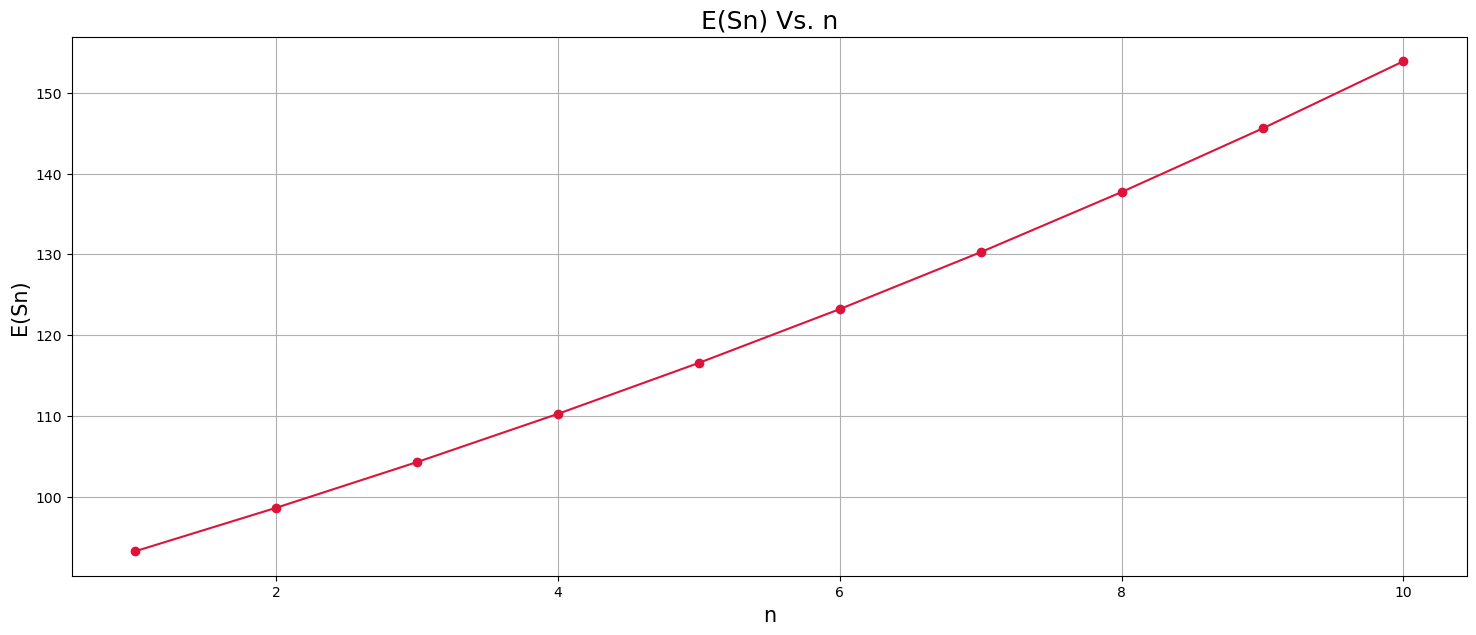

In [27]:
# For each integer number 𝑛 from 1 to 10, use 1,000 simulations of 𝑆𝑛 to estimate 𝐸(𝑆𝑛)
size = 1000
seed = 42

r = 0.055
sigma = 0.2
S0 = 88

n_vals = range(1, 11)
E_Sn_vals = np.empty(len(n_vals))

for i in range(len(n_vals)):
    E_Sn_vals[i] = GBM_BBMC(S0, r, n_vals[i], sigma, size, seed)

# Plot all of the above 𝐸(𝑆𝑛), for 𝑛 ranging from 1 to 10, in one graph
plt.figure(figsize=(18, 7))
plt.plot(n_vals, E_Sn_vals, "-o", color="crimson")
plt.title("E(Sn) Vs. n", fontsize=18)
plt.xlabel("n", fontsize=15)
plt.ylabel("E(Sn)", fontsize=15)
plt.grid(True)
plt.show();

**Part b**

In [28]:
# Simulates a GBM path of 𝑆𝑡 for [0, t] by dividing up the interval [0, t] into n_splits equal parts
def GBM_Path(S0, r, t, sigma, n_splits=1000, seed=42):
    np.random.seed(seed)
    z = np.random.normal(0, 1, size)
    dt = t/n_splits
    path = np.exp((r-sigma**2/2)*dt + sigma*dt**0.5*z)
    return S0*path.cumprod()

In [29]:
# simulate 3 paths of 𝑆𝑡 for 0 ≤ 𝑡 ≤ 10 by dividing up the interval [0, 10] into 1,000 equal parts
seeds = [33, 78, 70]

t = 10
n_splits = 1000

n_vals_2 = t/n_splits + np.arange(0, t, t/n_splits)
St_paths = np.empty((3, n_splits))

for i in range(3):
    St_paths[i, :] = GBM_Path(S0, r, t, sigma, n_splits, seeds[i])

**Part c**

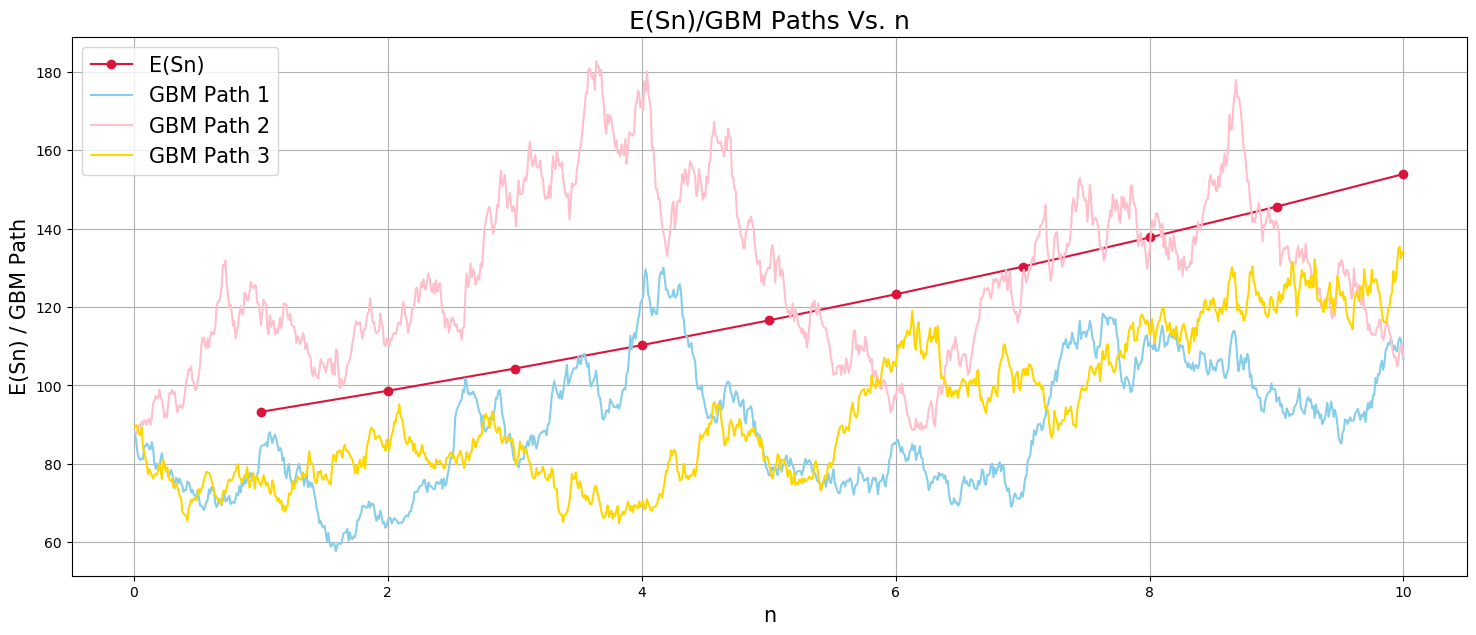

In [30]:
# Plot your data from parts (a) and (b) in one graph
colors = ['skyblue', 'pink', 'gold']

plt.figure(figsize=(18, 7))
plt.plot(n_vals, E_Sn_vals, "-o", color="crimson", label="E(Sn)")
for i in range(3):
    plt.plot(n_vals_2, St_paths[i, :], color=colors[i], label="GBM Path " + str(i+1))

plt.title("E(Sn)/GBM Paths Vs. n", fontsize=18)
plt.xlabel("n", fontsize=15)
plt.ylabel("E(Sn) / GBM Path", fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
plt.show();

**Part d**

Mean of this Geometric Brownian Motion process is given by $S_0e^{rt}$, which is independent of $\sigma$, so there will be no impact on the 𝐸(𝑆𝑛) graph if we increase $\sigma$ from 20% to 30%.

Variance of this Geometric Brownian Motion process is given by $S_0^2e^{2rt}(e^{\sigma^2t}-1)$, so increasing $\sigma$ from 20% to 30% will increase the variance of the process. Meaning, when there is an uptrend/downtrend in the prices, it will rise/fall more for $\sigma = 30\%$ as compared to the prices for $\sigma = 20\%$.

## Question 5

**Part a**

In [31]:
# Estimates the price of a European Call option using Monte Carlo simulation with Euler’s discretization scheme
def BSEC_EDMC(S0, X, r, T, sigma, dt=0.05, size=10000, seed=42):
    np.random.seed(seed)
    ST = np.zeros(size)
    # Find number of time steps to take
    M = int(T/dt)

    for i in range(size):
        z = np.random.normal(0, 1, size)
        ST[i] = S0       
        for k in range(M):
            ST[i] = ST[i] + r*ST[i]*dt + sigma*ST[i]*dt**0.5*z[k]  
    
    CT = (ST-X).clip(min=0)
    Ct = np.exp(-r*T)*CT
    return Ct.mean(), (Ct.var()/size)**0.5

**Part b**

In [32]:
# Estimates the price of a European Call option using Monte Carlo simulation with Milshtein’s discretization scheme
def BSEC_MDMC(S0, X, r, T, sigma, dt=0.05, size=10000, seed=42):
    np.random.seed(seed)
    ST = np.zeros(size)
    # Find number of time steps to take
    M = int(T/dt)

    for i in range(size):
        z = np.random.normal(0, 1, size)
        ST[i] = S0        
        for k in range(M):
            ST[i] = ST[i] + r*ST[i]*dt + sigma*ST[i]*dt**0.5*z[k] + 1/2*sigma*ST[i]*sigma*(dt*z[k]**2 - dt)

    CT = (ST-X).clip(min=0)
    Ct = np.exp(-r*T)*CT
    return Ct.mean(), (Ct.var()/size)**0.5

**Part c**

In [33]:
# Computes approximate value of Standard Normal CDF
def norm_cdf_approx(x):
    d1 = 0.0498673470
    d2 = 0.0211410061
    d3 = 0.0032776263
    d4 = 0.0000380036
    d5 = 0.0000488906
    d6 = 0.0000053830
    if x >= 0:
        return 1 - 1/2*(1 + d1*x + d2*x**2 + d3*x**3 + d4*x**4 + d5*x**5 + d6*x**6)**(-16)
    else:
        return 1 - norm_cdf_approx(-x)

# Computes the approximate value of the option c using the Black-Scholes formula with normal approximation
def BSEC_norm_apporx(S0, X, r, T, sigma):
    zp = z_plus(S0, X, r, T, sigma)
    zm = zp - sigma*np.sqrt(T)
    return S0*norm.cdf(zp) - np.exp(-r*T)*X*norm_cdf_approx(zm)

**Part d**

In [34]:
# Use the results of (a) to (c) to compare the two schemes of parts (a) and (b)
size = 10000
seed = 42

X = 100
sigma = 0.25
r = 0.055
T = 0.5
dt = 0.05
S0_vals = range(95, 105)

df_stats = pd.DataFrame()
df_stats["S0"] = S0_vals

for i in range(len(S0_vals)):
    df_stats.loc[i, "Ct_a"], df_stats.loc[i, "Std[Ct_a]"] = BSEC_EDMC(S0_vals[i], X, r, T, sigma, dt, size, seed)
    df_stats.loc[i, "Ct_b"], df_stats.loc[i, "Std[Ct_b]"] = BSEC_MDMC(S0_vals[i], X, r, T, sigma, dt, size, seed)
    df_stats.loc[i, "Ct_c"] = BSEC_norm_apporx(S0_vals[i], X, r, T, sigma)

In [35]:
print("Prices and the standard errors of the estimate for methods in a-c:")
display(df_stats)

Prices and the standard errors of the estimate for methods in a-c:


,S0,Ct_a,Std[Ct_a],Ct_b,Std[Ct_b],Ct_c
0,95,5.669116,0.100385,5.655824,0.101434,5.688941
1,96,6.169047,0.104808,6.151095,0.105851,6.182337
2,97,6.689846,0.109243,6.668473,0.110273,6.699235
3,98,7.233306,0.113668,7.209891,0.114680,7.239340
4,99,7.800557,0.118065,7.773437,0.119071,7.802287
5,100,8.392908,0.122415,8.361908,0.123417,8.387624
6,101,9.009201,0.126714,8.974577,0.127713,8.994853
7,102,9.648875,0.130956,9.611563,0.131948,9.623432
8,103,10.310230,0.135141,10.270111,0.136128,10.272774
9,104,10.991165,0.139275,10.948548,0.140257,10.942249


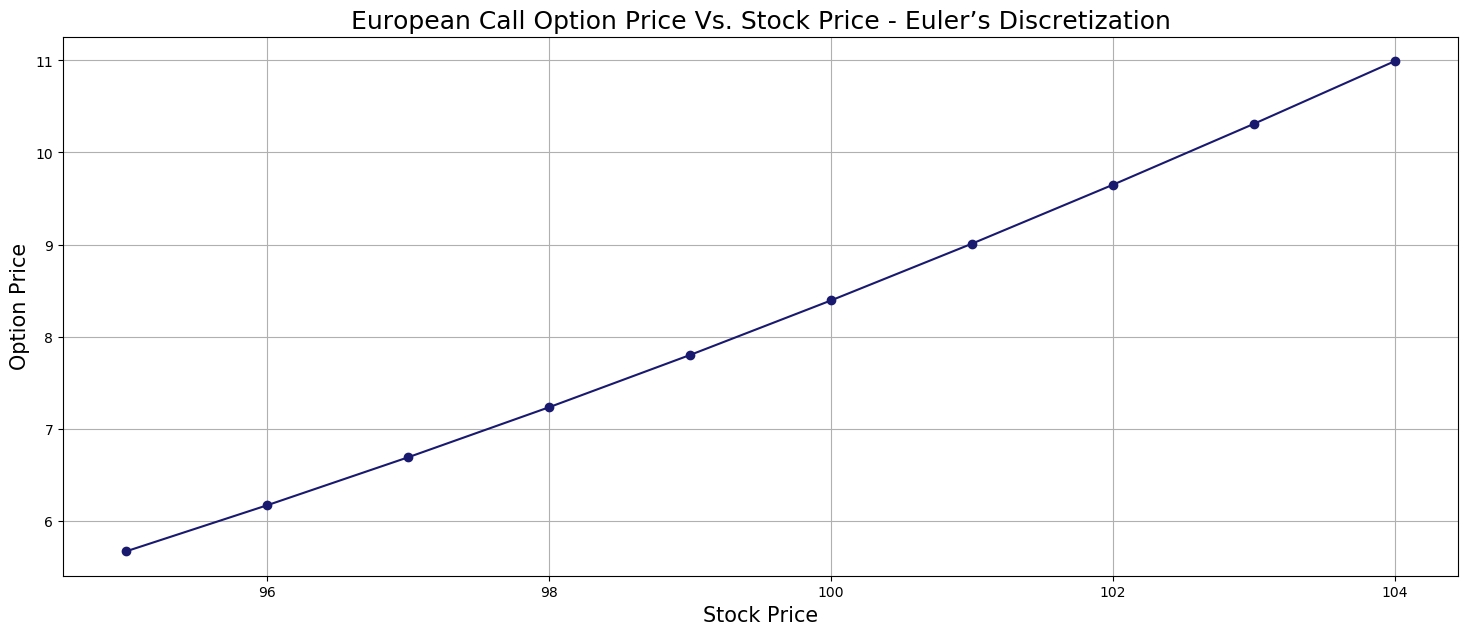

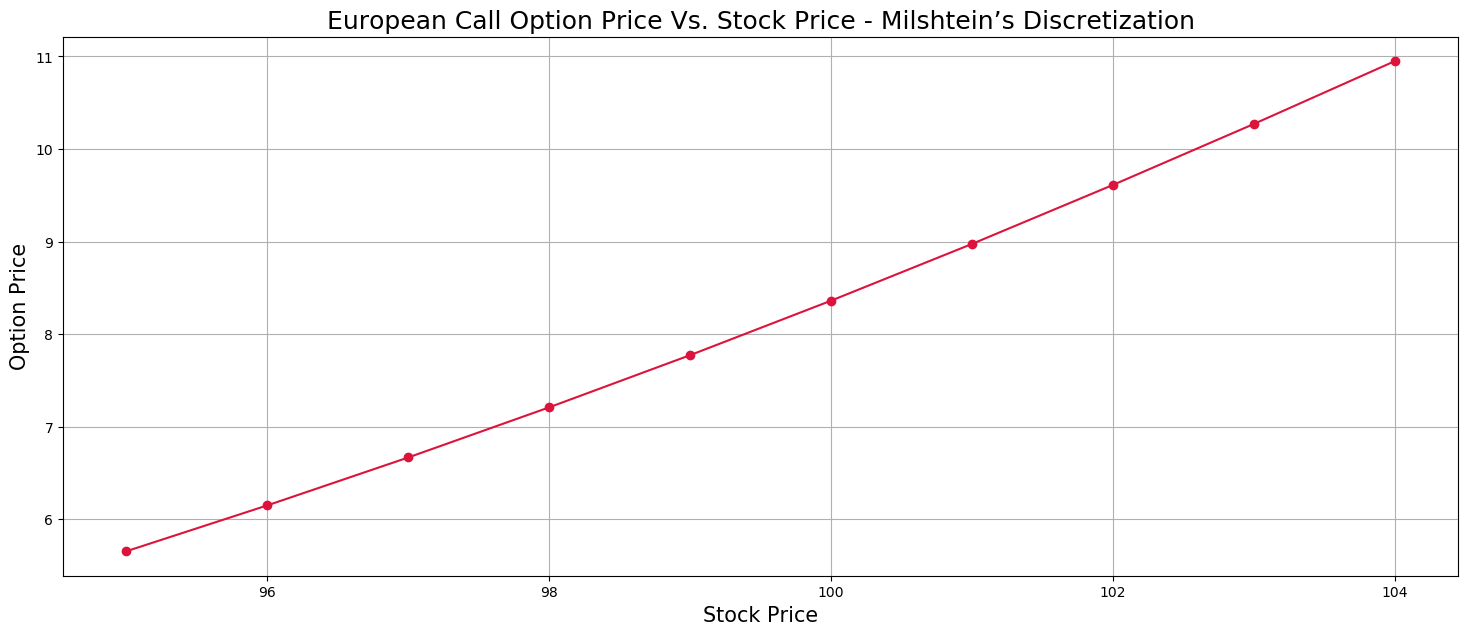

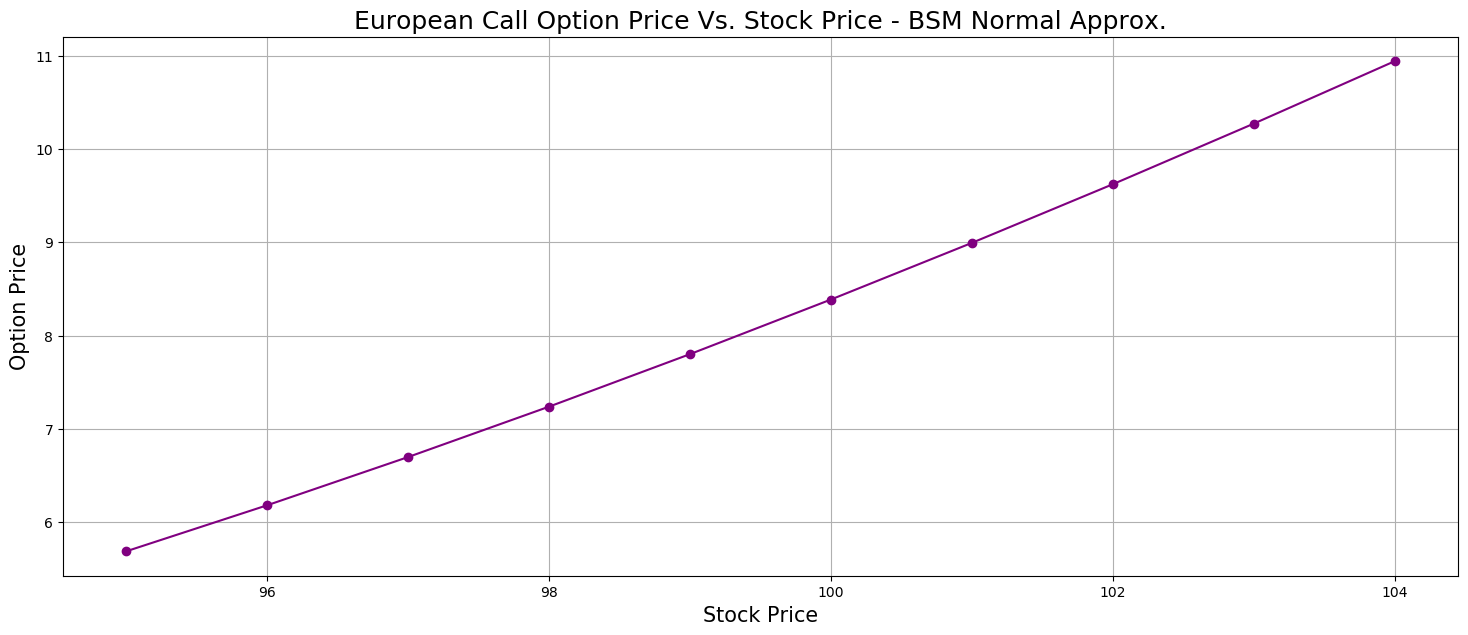

In [36]:
# Plot European Call Option Price Vs. Stock Price for all the 3 methods
colors = ['midnightblue', 'crimson', 'purple']
labels = ["Euler’s Discretization", "Milshtein’s Discretization", "BSM Normal Approx."]

for i in range(3):
    plt.figure(figsize=(18, 7))
    plt.plot(S0_vals, df_stats.iloc[:, 2*i+1].values, "-o", color=colors[i])
    plt.title("European Call Option Price Vs. Stock Price - " + labels[i], fontsize=18)
    plt.xlabel("Stock Price", fontsize=15)
    plt.ylabel("Option Price", fontsize=15)
    plt.grid(True)
    plt.show();

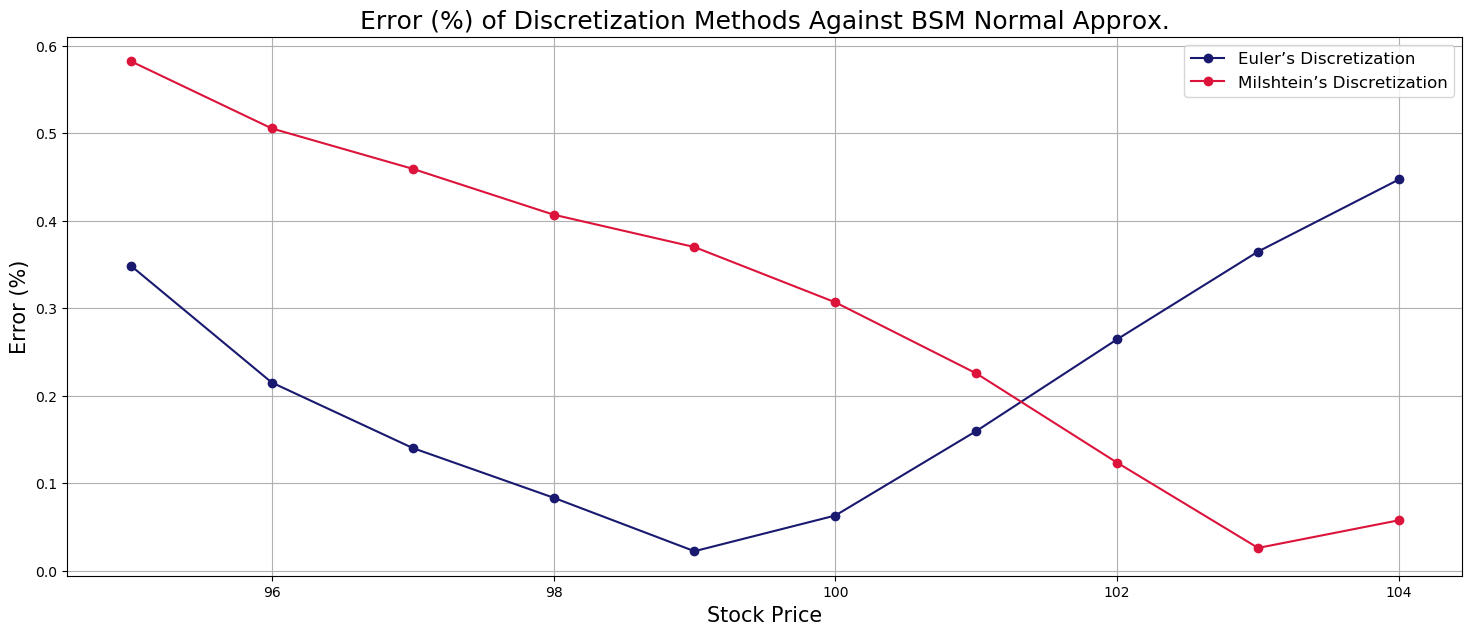

In [37]:
# Plot Error (%) of Discretization Methods Against BSM Normal Approx.
errors_euler = abs(df_stats["Ct_a"] - df_stats["Ct_c"])/df_stats["Ct_c"]*100
errors_milshtein = abs(df_stats["Ct_b"] - df_stats["Ct_c"])/df_stats["Ct_c"]*100 

plt.figure(figsize=(18, 7))
plt.plot(S0_vals, errors_euler.values, "-o", color='midnightblue', label="Euler’s Discretization")
plt.plot(S0_vals, errors_milshtein.values, "-o", color='crimson', label="Milshtein’s Discretization")
plt.title("Error (%) of Discretization Methods Against BSM Normal Approx.", fontsize=18)
plt.xlabel("Stock Price", fontsize=15)
plt.ylabel("Error (%)", fontsize=15)
plt.grid(True)
plt.legend(fontsize=12)
plt.show();

We can see from the above plot that with increasing stock values error percentage is decreasing for Milshtein’s method but for Euler’s it first decreases then increases. Due to this reason, for stock price up to 101, Euler’s Discretization is providing better approximation but after that Milshtein’s is better.

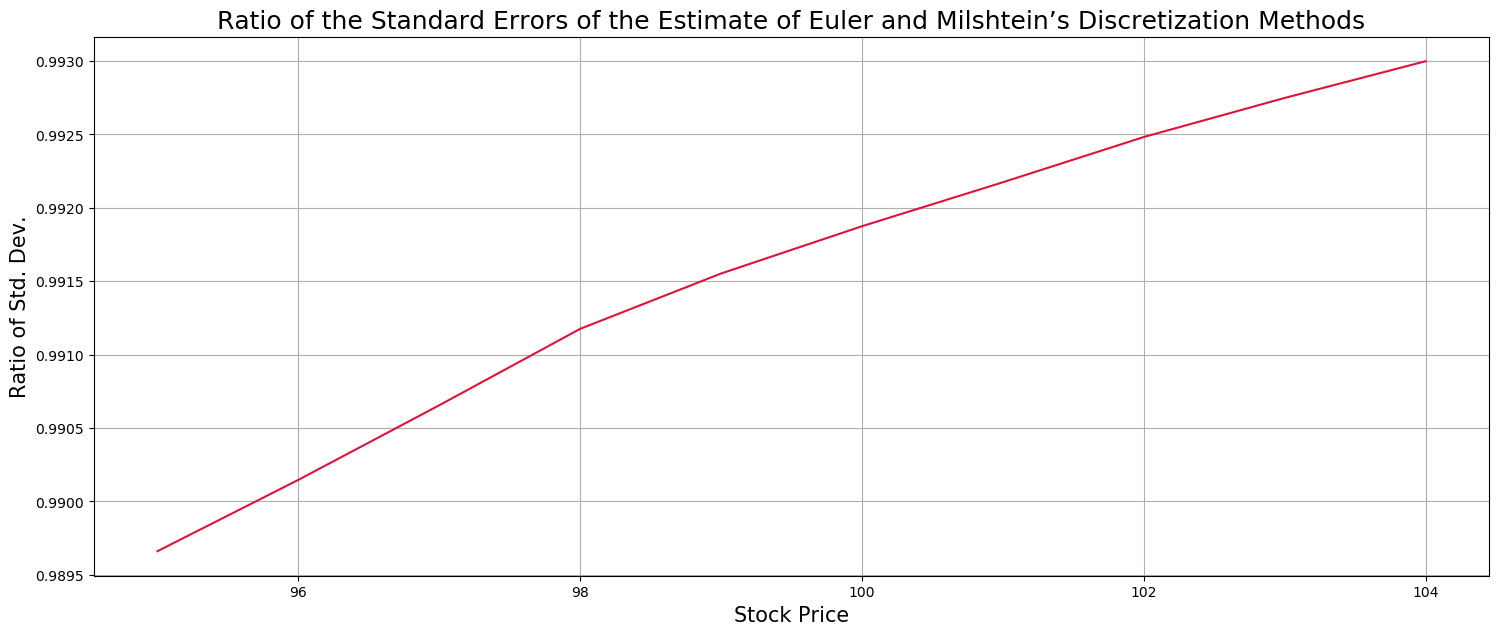

In [38]:
# Plot the ratio of the Standard Errors of the Estimates Vs. Stock Price
std_ratio = df_stats["Std[Ct_a]"]/df_stats["Std[Ct_b]"]

plt.figure(figsize=(18, 7))
plt.plot(S0_vals, std_ratio.values, color='crimson')
plt.title("Ratio of the Standard Errors of the Estimate of Euler and Milshtein’s Discretization Methods", fontsize=18)
plt.xlabel("Stock Price", fontsize=15)
plt.ylabel("Ratio of Std. Dev.", fontsize=15)
plt.grid(True)
plt.show();

We can see from the above plot that with increasing stock values, the ratio of the standard errors of the estimate of Euler and Milshtein’s Discretization Methods is increasing but it is always less than 1, meaning Euler’s Discretization Method is providing more consistent results but this outperformance is diminishing with increasing stock prices.

**Part e**

In [39]:
# Computes exact BS Greeks values for European call option
def BSEC_Greeks(S0, X, r, T, sigma):
    zp = z_plus(S0, X, r, T, sigma)
    zm = zp - sigma*np.sqrt(T)
    ec_delta = norm.cdf(zp)
    ec_gamma = norm.pdf(zp)/(sigma*T**0.5*S0)
    ec_theta = -sigma*S0*norm.pdf(zp)/(2*T**0.5) - r*X*np.exp(-r*T)*norm.cdf(zm)
    ec_vega = S0*norm.pdf(zp)*T**0.5
    return ec_delta, ec_gamma, ec_theta, ec_vega

In [40]:
# Estimates the Greeks of a European Call option using Monte Carlo simulation
def BSEC_BBMC_Greeks(S0, X, r, T, sigma, epsilon=0.01, size=100000, seed=42):
    ec_plus = BSEC_BBMC(S0*(1+epsilon), X, r, T, sigma, size, seed)[0]
    ec_minus = BSEC_BBMC(S0*(1-epsilon), X, r, T, sigma, size, seed)[0]
    ec_zero = BSEC_BBMC(S0, X, r, T, sigma, size, seed)[0]
    ec_delta = (ec_plus - ec_minus)/(2*epsilon*S0)
    ec_gamma = (ec_plus + ec_minus - 2*ec_zero)/(epsilon*S0)**2

    ec_plus = BSEC_BBMC(S0, X, r, T*(1+epsilon), sigma, size, seed)[0]
    ec_minus = BSEC_BBMC(S0, X, r, T*(1-epsilon), sigma, size, seed)[0]
    ec_theta = -(ec_plus - ec_minus)/(2*epsilon*T)
    
    ec_plus = BSEC_BBMC(S0, X, r, T, sigma*(1+epsilon), size, seed)[0]
    ec_minus = BSEC_BBMC(S0, X, r, T, sigma*(1-epsilon), size, seed)[0]
    ec_vega = (ec_plus - ec_minus)/(2*epsilon*sigma)

    return ec_delta, ec_gamma, ec_theta, ec_vega

In [41]:
# Estimate the European call option’s greeks
size = 100000
seed = 42

X = 100
sigma = 0.25
r = 0.055
T = 0.5
epsilon = 0.01

S0_vals = list(range(95, 106))

df_greeks_bbmc = pd.DataFrame(index=S0_vals, columns=['Delta', 'Gamma', 'Theta', 'Vega'])
df_greeks_analytical = pd.DataFrame(index=S0_vals, columns=['Delta', 'Gamma', 'Theta', 'Vega'])

for S0 in S0_vals:
    df_greeks_bbmc.loc[[S0]] = BSEC_BBMC_Greeks(S0, X, r, T, sigma, epsilon, size, seed)
    df_greeks_analytical.loc[[S0]] = BSEC_Greeks(S0, X, r, T, sigma)

In [42]:
print("Estimated European call option’s greeks:")
display(df_greeks_bbmc)

Estimated European call option’s greeks:


,Delta,Gamma,Theta,Vega
95,0.481548,0.023674,-8.913878,26.844576
96,0.505417,0.024059,-9.116033,27.153373
97,0.52912,0.023336,-9.29618,27.367205
98,0.552388,0.023214,-9.450001,27.488813
99,0.57505,0.022109,-9.581109,27.514682
100,0.597075,0.02194,-9.686853,27.459437
101,0.618665,0.021247,-9.769977,27.317691
102,0.639549,0.020539,-9.830525,27.08468
103,0.659765,0.019891,-9.869669,26.786583
104,0.679408,0.019386,-9.888791,26.421734


In [43]:
print("Exact European call option’s greeks:")
display(df_greeks_analytical)

Exact European call option’s greeks:


,Delta,Gamma,Theta,Vega
95,0.481573,0.02373,-8.895928,26.770412
96,0.505197,0.023506,-9.097113,27.078802
97,0.528559,0.023206,-9.274667,27.29305
98,0.551585,0.022835,-9.428345,27.413852
99,0.574208,0.0224,-9.558145,27.442826
100,0.596366,0.021906,-9.664303,27.382437
101,0.618003,0.021359,-9.747268,27.235916
102,0.639069,0.020767,-9.807684,27.007173
103,0.659523,0.020134,-9.846371,26.700703
104,0.679327,0.019469,-9.864299,26.32149


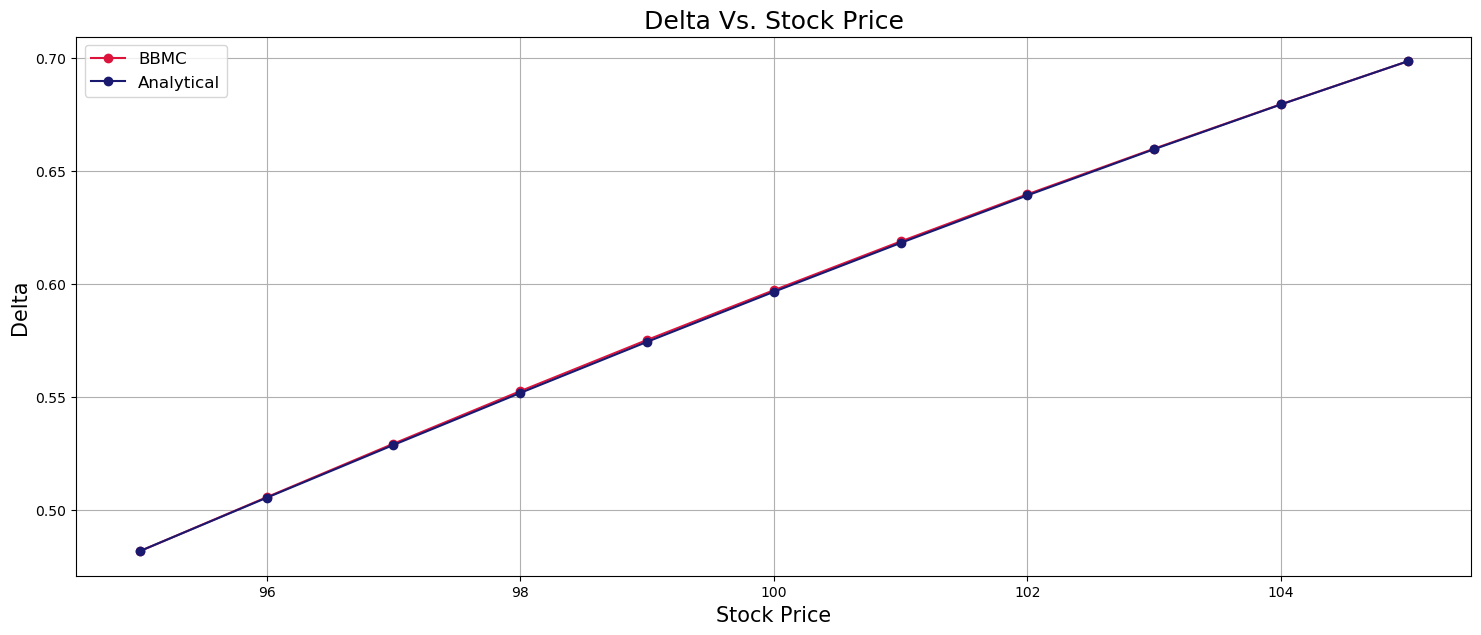

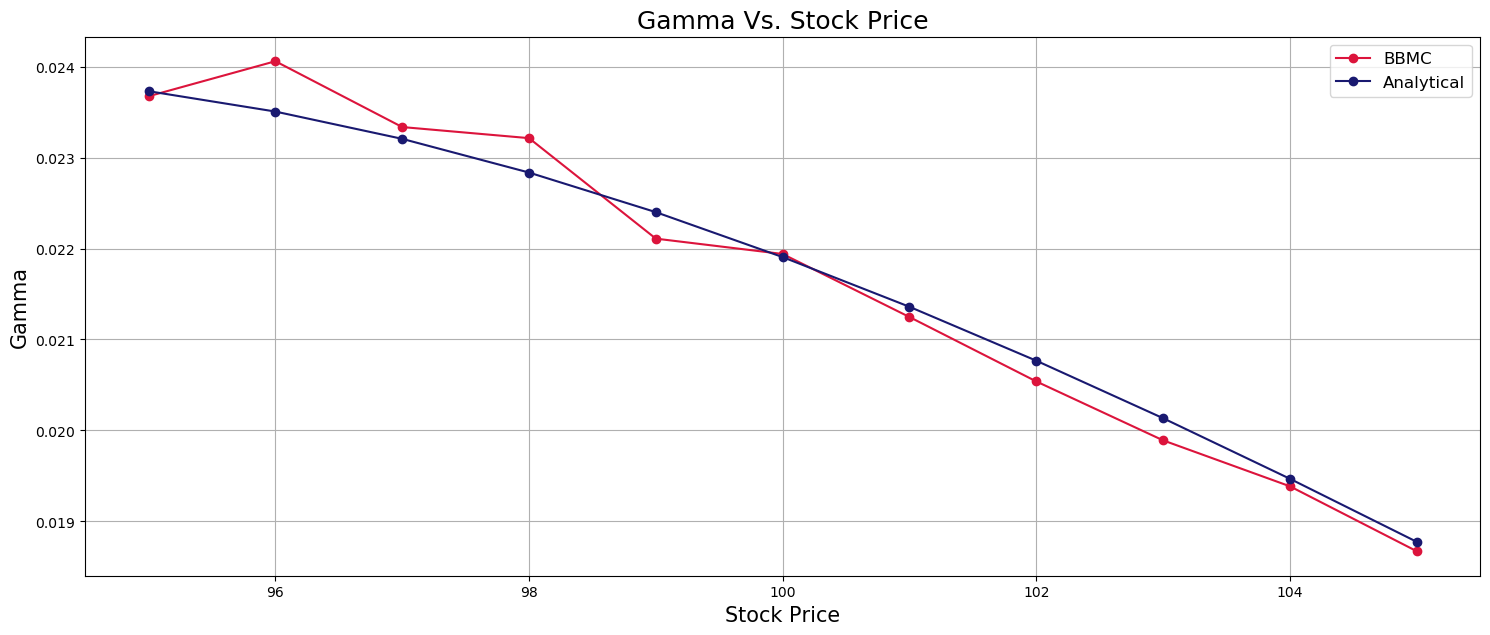

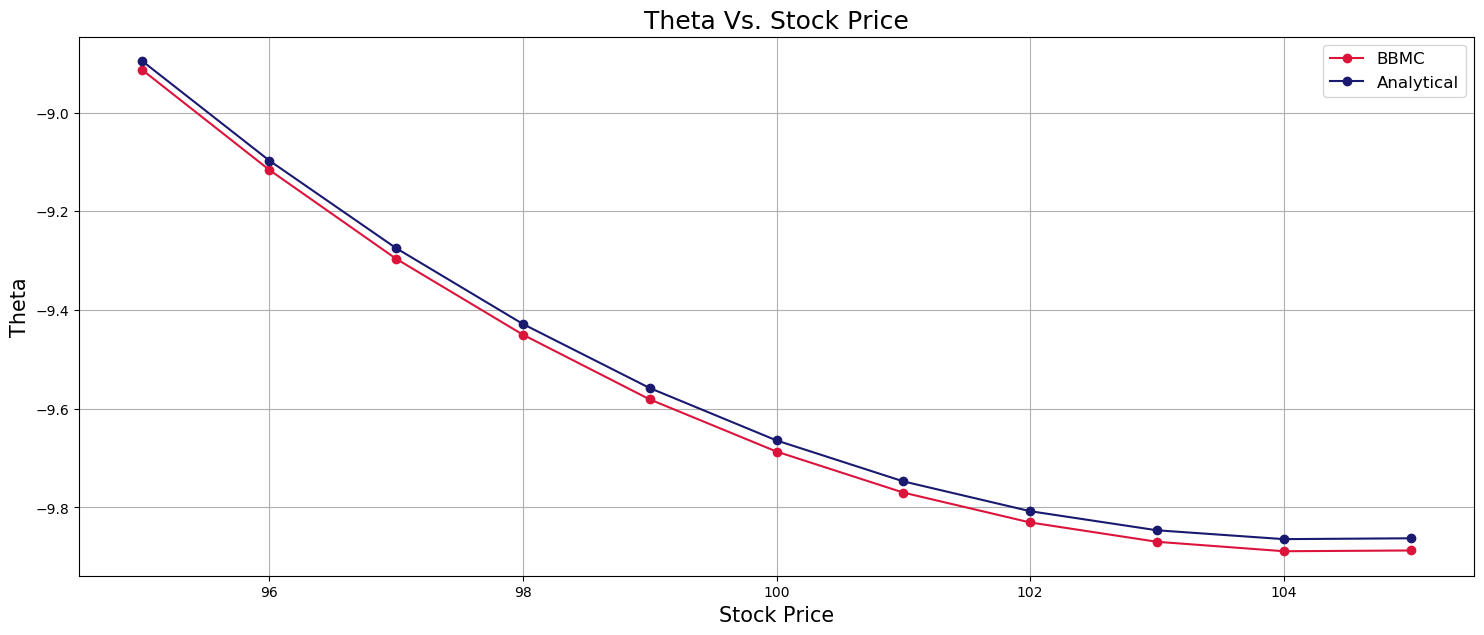

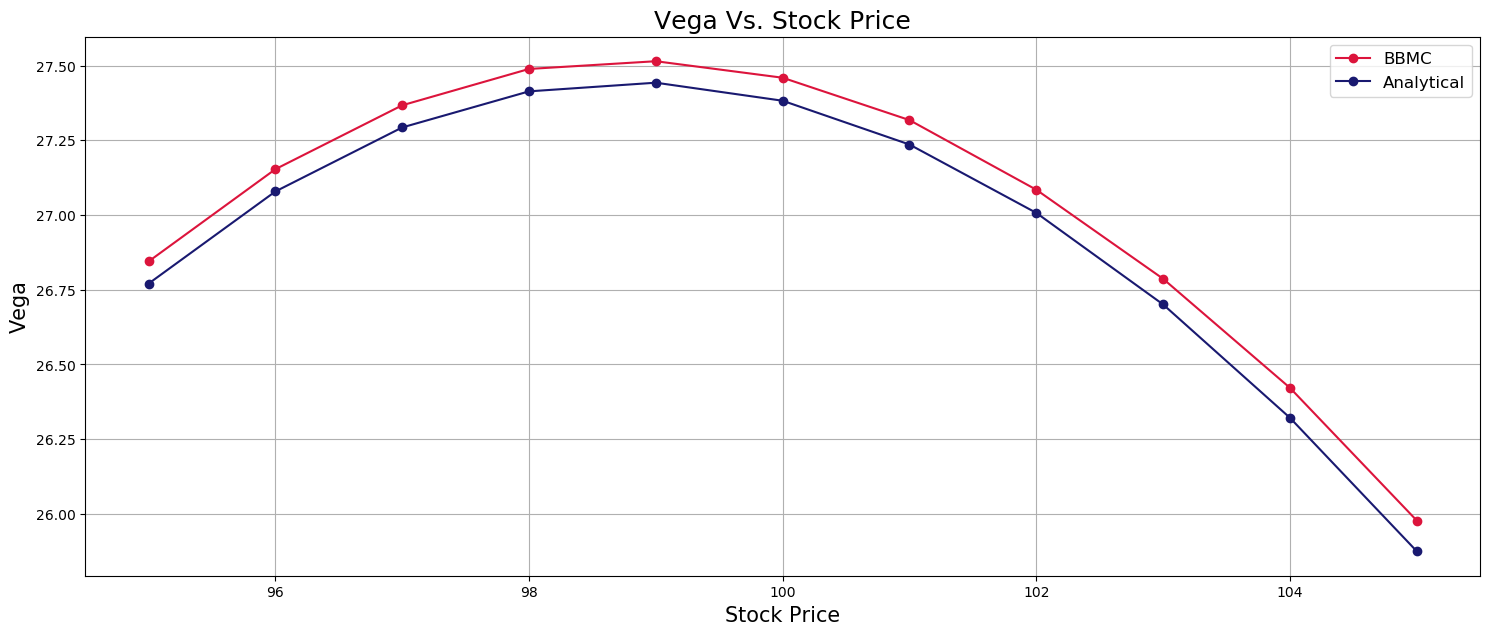

In [44]:
# Plot Greek Values Vs. Stock Price
for i in range(len(df_greeks_bbmc.columns)):
    plt.figure(figsize=(18, 7))
    plt.plot(S0_vals, df_greeks_bbmc.iloc[:, i].values, "-o", color='crimson', label="BBMC")
    plt.plot(S0_vals, df_greeks_analytical.iloc[:, i].values, "-o", color='midnightblue', label="Analytical")
    plt.title(df_greeks_bbmc.columns[i] + " Vs. Stock Price", fontsize=18)
    plt.xlabel("Stock Price", fontsize=15)
    plt.ylabel(df_greeks_bbmc.columns[i], fontsize=15)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show();

## Question 6

In [45]:
# Computes f1(V) for different schemes
def f1(V, scheme):
    if scheme == "Reflection":
        return abs(V)
    elif scheme == "Partial Truncation" or scheme == "Full Truncation":
        return V
    else:
        np.nan
# Computes f2(V) for different schemes
def f2(V, scheme):
    if scheme == "Reflection":
        return abs(V)
    elif scheme == "Partial Truncation":
        return V
    elif scheme == "Full Truncation":
        return (V).clip(min=0)
    else:
        np.nan
# Computes f3(V) for different schemes
def f3(V, scheme):
    if scheme == "Reflection":
        return abs(V)
    elif scheme == "Partial Truncation" or scheme == "Full Truncation":
        return (V).clip(min=0)
    else:
        np.nan
        
# Estimates the price of a Heston European Call option using Monte Carlo simulation with Euler’s discretization
def BSEC_EDMC_Heston(S0, X, r, T, sigma, V0, alpha, beta, rho, dt, N, scheme, seed=42):
    np.random.seed(seed)
    ST = np.zeros(N)
    VT = np.zeros(N)
    M = int(T/dt)
    # Multivariate Normal
    mvn_mean = [0, 0]
    mvn_cov = [[1, rho], [rho, 1]]

    for i in range(N):
        z = np.random.multivariate_normal(mvn_mean, mvn_cov, size=M)
        ST[i] = S0
        VT[i] = V0
        for k in range(M):
            ST[i] = ST[i] + r*ST[i]*dt + np.sqrt(f3(VT[i], scheme))*ST[i]*dt**0.5*z[k, 0]
            VT[i] = f1(VT[i], scheme) + alpha*(beta-f2(VT[i], scheme))*dt + sigma*np.sqrt(f3(VT[i], scheme))*dt**0.5*z[k, 1]

    CT = (ST-X).clip(min=0)
    Ct = np.exp(-r*T)*CT
    return Ct.mean()

In [46]:
# Estimate the price of a European Call option (via Monte Carlo simulation)
seed = 42

S0 = 100
X = 100
sigma = 0.42
r = 0.055

V0 = 0.05
alpha = 5.8
beta = 0.0625
rho = -0.6

dt = 0.05
N = 10000

# T is not given, using T = 0.5
T = 0.5

# Use the Full Truncation, Partial Truncation, and Reflection methods, and provide 3 price estimates by using the three methods
schemes = ["Reflection", "Partial Truncation", "Full Truncation"]
df_heston = pd.DataFrame(index=["Call Option Price"])

for scheme in schemes:
    df_heston.loc["Call Option Price", scheme] = BSEC_EDMC_Heston(S0, X, r, T, sigma, V0, alpha, beta, rho, dt, N, scheme, seed)

In [47]:
print("The price estimates for the three methods:")
display(df_heston)

The price estimates for the three methods:


,Reflection,Partial Truncation,Full Truncation
Call Option Price,7.808867,7.807123,7.806748


## Question 7

In [48]:
# Given sample length and bases finds corresponding halton sequences
def halton_sequence(N, bases):
    m = len(bases)
    r = np.zeros([m, N])
    k = 0

    for i in range(1, N+1):
        t = np.ones(m)
        t = i*t        
        prime_inv = np.zeros(m)
        for j in range(m):
            prime_inv[j] = 1.0/float(bases[j])
        while (np.sum(t) > 0):
            for j in range(0, m):
                d = (t[j] % bases[j])
                r[j, k] = r[j, k] + float(d)*prime_inv[j]
                prime_inv[j] = prime_inv[j]/bases[j]
                t[j] = (t[j]//bases[j])
        k = k + 1
    return r

# Computes the value of the given function for given x and y values
def f(x, y):    
    return np.exp(-x*y)*(np.sin(6*np.pi*x) + np.cbrt(np.cos(2*np.pi*y)))

# Computes the value of the integral of a given function using halton sequences
def compute_integral(fun, N, bases):
    haltons = halton_sequence(N, bases)
    f_vals = np.zeros(N)
    for i in range(N):        
        f_vals[i] = fun(haltons[0, i], haltons[1, i])
    return f_vals.mean()

In [49]:
N = 10000
bases = (2, 3)

print("The desired integral value is, I =", compute_integral(f, N, bases))

The desired integral value is, I = 0.0262619735093144
